In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt
(x_train, y_train),(x_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

NameError: ignored

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
from matplotlib import pyplot as plt

Label is : 9


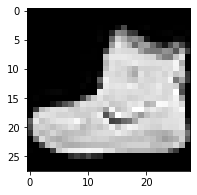

Label is : 0


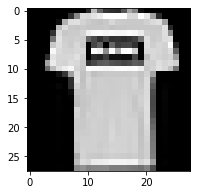

Label is : 0


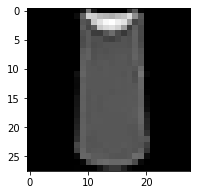

Label is : 3


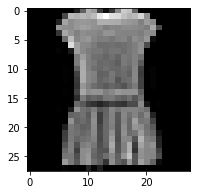

Label is : 0


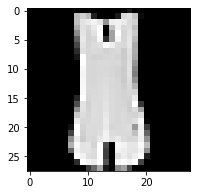

Label is : 2


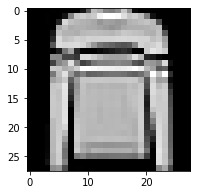

Label is : 7


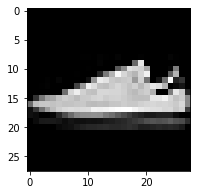

Label is : 2


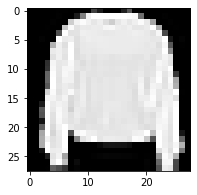

Label is : 5


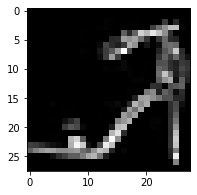

In [ ]:
for i in range(0,9):
  plt.figure(figsize=(3,3))
  img=x_train[i]
  plt.imshow(img,cmap="gray")
  print("Label is :",y_train[i])
  plt.show()

In [ ]:
x_train.ndim

3

In [ ]:
x_train=x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test=x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape= (28, 28, 1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
print(x_train[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.1))
model.add(Dense(10,activation=tf.nn.softmax))


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=6)

Epoch 1/6
1875/1875 [==============================] - 32s 17ms/step - loss: 0.4110 - accuracy: 0.8516
Epoch 2/6
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2770 - accuracy: 0.8999
Epoch 3/6
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2288 - accuracy: 0.9159
Epoch 4/6
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1950 - accuracy: 0.9277
Epoch 5/6
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1668 - accuracy: 0.9391
Epoch 6/6
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1428 - accuracy: 0.9466


In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2615 - accuracy: 0.9118


[0.2615320384502411, 0.9118000268936157]

In [ ]:
prediction=model.predict(x_test)
print(prediction)

[[2.8355370e-07 1.2785050e-08 1.1098987e-09 ... 8.1677258e-04
  1.5554080e-07 9.9918252e-01]
 [1.4205915e-07 2.5350173e-11 9.9999785e-01 ... 2.6516618e-16
  2.4741455e-11 8.2526434e-13]
 [8.1152323e-14 1.0000000e+00 1.7364945e-15 ... 7.9829431e-18
  1.8896751e-17 2.0309682e-20]
 ...
 [4.4982016e-06 3.0501594e-11 8.9016421e-06 ... 5.5187482e-10
  9.9988127e-01 5.8981309e-10]
 [3.3532758e-12 1.0000000e+00 4.4762493e-14 ... 9.9317167e-17
  2.0209948e-16 2.0988655e-13]
 [1.1727091e-05 2.6311261e-06 5.6898898e-05 ... 1.2167697e-02
  1.6164761e-04 3.6312485e-04]]


In [ ]:
print(prediction[9999])

[1.1727091e-05 2.6311261e-06 5.6898898e-05 1.7237724e-05 1.5998649e-04
 9.8702544e-01 3.3712735e-05 1.2167697e-02 1.6164761e-04 3.6312485e-04]


Expected Answer:  Sandals
Actual Answer:  Sandals


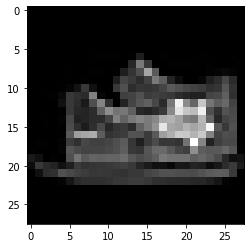

In [ ]:
image_index = 9999
plt.imshow(x_test[image_index].reshape(28,28),cmap="gray")
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))

p= pred.argmax()
D={0:'T-shirt', 1:'Trouser', 2:'Pull-Over', 3:'Dress', 4:'Coat', 5:'Sandals', 6:'Shirts', 7:'Sneakers', 8:'Bag', 9:'Ankle Boots'}
print("Expected Answer: ",D[p])
print("Actual Answer: ",D[y_test[image_index]])

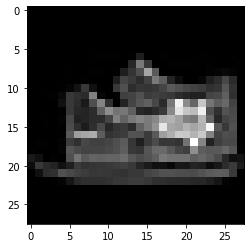

In [ ]:
plt.imshow(x_test[9999].reshape(28,28),cmap="gray")